In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

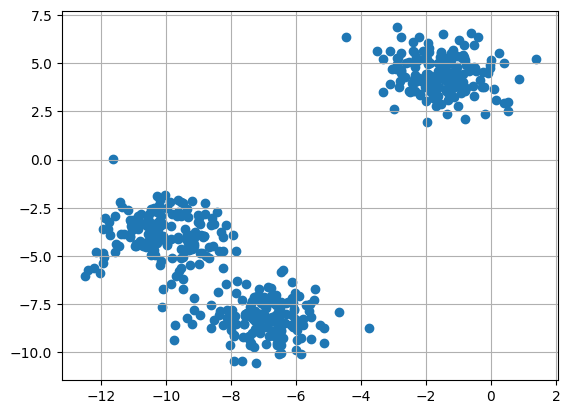

In [2]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 1)
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [3]:
def initialize_clusters(X, k):
  clusters = {}
  np.random.seed(23)
  for i in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {'center' : center,'points' : [] }
    clusters[i] = cluster
  print(clusters)
  plt.scatter(X[:,0],X[:,1])
  plt.grid(True)
  for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
  plt.show()
  return clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []}, 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []}, 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}


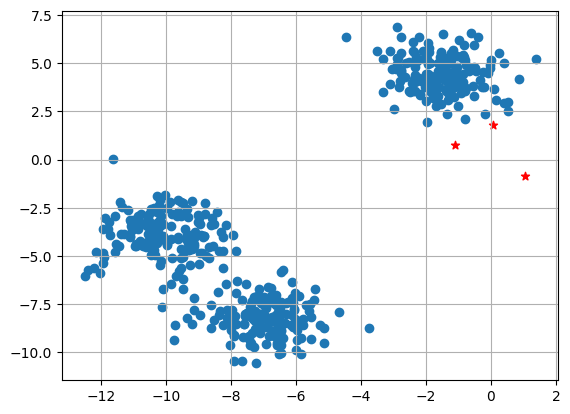

In [4]:
# Number of clusters
k = 3

# Initialize cluster centers
clusters = initialize_clusters(X, k)


In [5]:
def distance(p1,p2):
 return np.sqrt(np.sum((p1-p2)**2))

In [6]:
def assign_clusters(X, clusters):
  for i in range(X.shape[0]):
   dist = []
   curr_x = X[i]
   for j in range(k):
      dis = distance(curr_x,clusters[j]['center'])
      dist.append(dis)
   curr_cluster = np.argmin(dist)
   clusters[curr_cluster]['points'].append(curr_x)
  return clusters

In [7]:
# Function to update cluster centers
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis=0)
            clusters[i]['center'] = new_center
            clusters[i]['points'] = []
    return clusters

In [8]:
# K-means algorithm iterations
while True:
    # Assign data points to clusters
    clusters = assign_clusters(X, clusters)

    # Update cluster centers
    new_clusters = update_clusters(X, clusters)

    # Check for convergence
    if clusters == new_clusters:
        break
    else:
        clusters = new_clusters

In [9]:
# Function to predict cluster for data points
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i], clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred


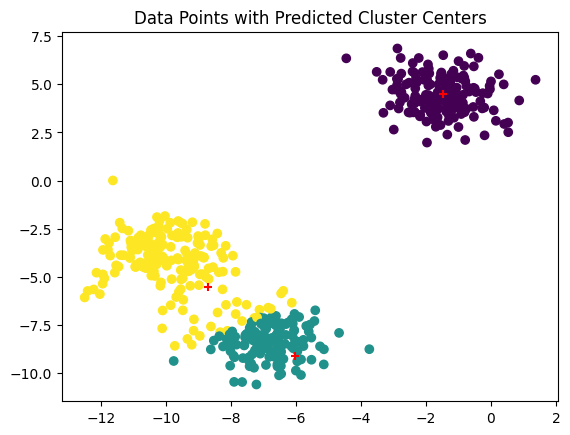

In [10]:
# Predict cluster for data points
predictions = pred_cluster(X, clusters)

# Plot data points with predicted cluster centers
plt.scatter(X[:, 0], X[:, 1], c=predictions)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='+', c='red')
plt.title('Data Points with Predicted Cluster Centers')
plt.show()

***Applying K-Means on Iris Dataset***

***Exercice 2***

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


iris = load_iris()
X_iris = iris.data

In [13]:
# Find the optimal number of clusters (k) using the elbow method
sse = []  # Sum of squared distances
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_iris)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

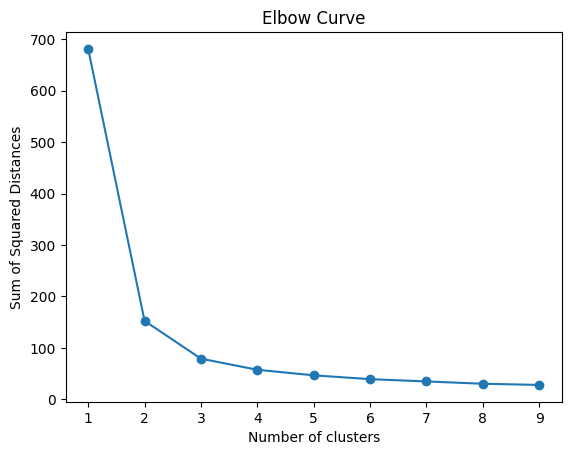

In [14]:
# Plot the elbow curve
plt.plot(range(1, 10), sse, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


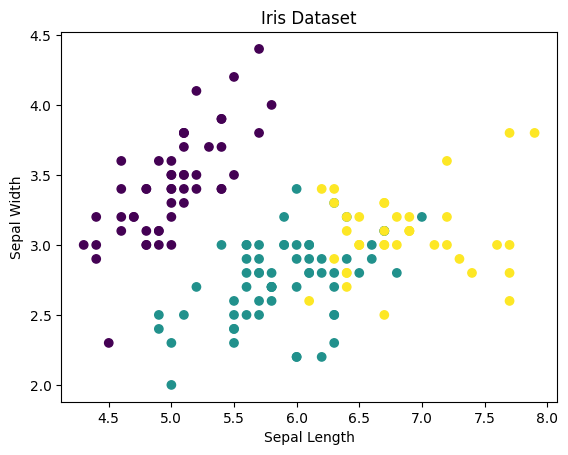

In [17]:
Kmeans = KMeans(n_clusters=3)
Kmeans.fit(X_iris)
labels = Kmeans.labels_
plt.scatter(X_iris[:,0],X_iris[:,1],c=labels)
plt.title('Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [18]:
# Build the model with the optimal k-value
optimal_k = 3  # From the elbow curve, it seems the optimal k is 3
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X_iris)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [19]:
#Find the cluster centers
cluster_centers = kmeans.cluster_centers_
print("Cluster centers:\n", cluster_centers)

Cluster centers:
 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [39]:
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

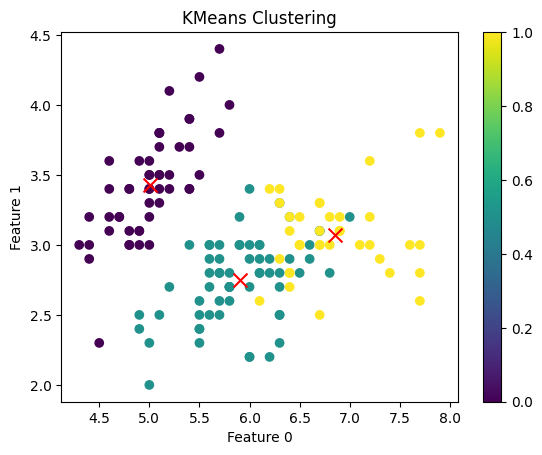

In [31]:
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', s=100)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('KMeans Clustering')
plt.colorbar()
plt.show()


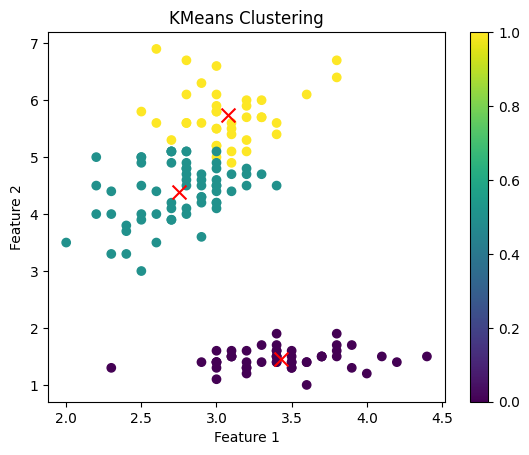

In [30]:
plt.scatter(X_iris[:, 1], X_iris[:, 2], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='x', color='red', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.colorbar()
plt.show()

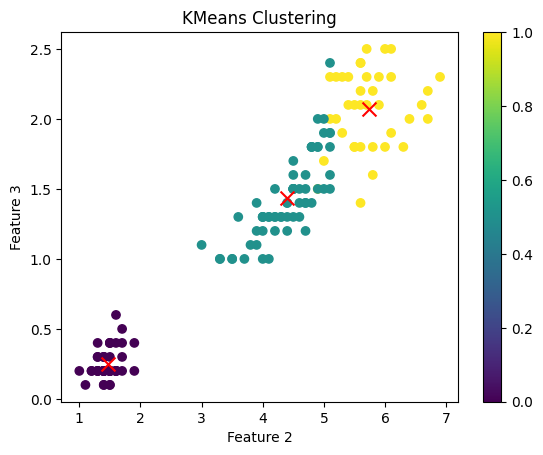

In [29]:
plt.scatter(X_iris[:, 2], X_iris[:, 3], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], marker='x', color='red', s=100)
plt.xlabel('Feature 2')
plt.ylabel('Feature 3')
plt.title('KMeans Clustering')
plt.colorbar()
plt.show()

In [52]:
def plot_clusters(X, cluster_centers, labels, new_observation=None):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 2], c=labels, cmap="viridis", s=25, alpha=0.7)
    plt.scatter(
        cluster_centers[:, 0],
        cluster_centers[:, 2],
        c="red",
        marker="x",
        s=50,
        label="Cluster Centers",
    )
    if new_observation is not None:
        plt.scatter(
            new_observation[0],
            new_observation[2],
            c="green",
            marker="o",
            s=100,
            label="New Observation",
        )
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 3")
    plt.title("K-means Clustering")
    plt.legend()

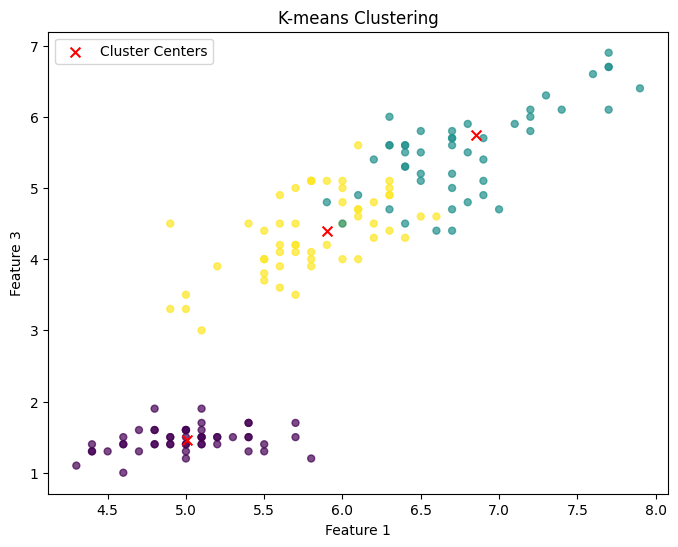

In [53]:
plot_clusters(X_iris, cluster_centers, labels)

In [21]:
#Predict classes of each observation
predictions = kmeans.predict(X_iris)

#Predict the class of the given observation: [[0.8, 0.8, 0.8, 0.8]]
observation = np.array([[0.8, 0.8, 0.8, 0.8]])
predicted_class = kmeans.predict(observation)
print("Predicted class of the observation:", predicted_class)

Predicted class of the observation: [1]
